<a href="https://colab.research.google.com/github/Lavanya363/stock-price-LSTM/blob/main/stock_price_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from numpy import array

In [2]:
#reading data from the dataset
df = pd.read_csv("https://github.com/krishnaik06/Stock-MArket-Forecasting/raw/master/AAPL.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1 = df.reset_index()['close']

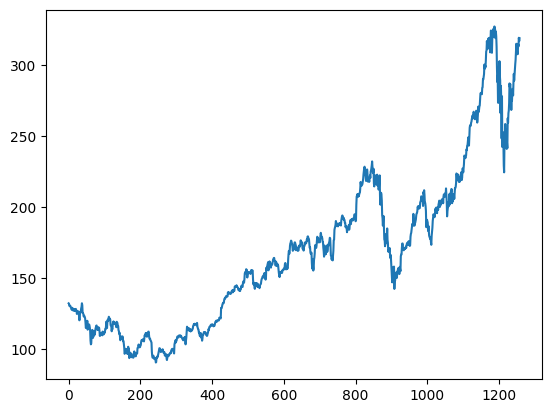

In [6]:
plt.plot(df1)

In [7]:
df1.shape

(1258,)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [12]:
#splitting dataset into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
len(train_data)

817

In [17]:
len(test_data)

441

In [23]:
def create_dataset(dataset,time_step=1):
  data_x,data_y = [],[]
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i + time_step,0])
  return np.array(data_x),np.array(data_y)


In [24]:
time_step = 100
x_train , y_train = create_dataset(train_data,time_step)
x_test ,y_test = create_dataset(test_data,time_step)

In [28]:
x_train.shape

(716, 100)

In [29]:
y_train.shape

(716,)

In [31]:
#reshaping of data
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [38]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 393ms/step - loss: 0.0183 - val_loss: 0.0564
Epoch 2/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 4/100
12/12 [==============================] - 3s 236ms/step - loss: 7.9112e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 4s 315ms/step - loss: 6.6748e-04 - val_loss: 0.0038
Epoch 6/100
12/12 [==============================] - 3s 241ms/step - loss: 6.1535e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 2s 210ms/step - loss: 6.3907e-04 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 2s 209ms/step - loss: 5.6180e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 4s 335ms/step - loss: 5.5318e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 3s 212ms/ste

In [41]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 39ms/step


In [43]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [44]:
math.sqrt(mean_squared_error(y_train,train_predict))

142.00186310355173

In [45]:
math.sqrt(mean_squared_error(y_test,test_predict))

235.50534728457453

In [46]:
len(test_data)

441

In [55]:
x_input= test_data[341:].reshape(1,-1)

In [56]:
x_input.shape

(1, 100)

In [50]:
temp_input = list(x_input_features)
temp_input = temp_input[0].tolist()

In [59]:
#prediction
lst_output = []
n_steps = 100
i = 0
while(i<30):
  if (len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape(1,n_steps,1)
    yhat = model.predict(x_input,verbose=0)
    print('{} day output'.format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
  else:
    x_input = x_input.reshape(1,n_steps,1)
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1


print(lst_output)

Streaming output truncated to the last 5000 lines.
 0.33123016 0.33122993 0.33122972 0.33122945 0.33122921 0.33122903
 0.33122885 0.33122858 0.33122838 0.3312282  0.33122802 0.33122775
 0.33122754 0.33122745 0.33122715 0.33122697 0.33122677 0.33122659
 0.33122641 0.33122617 0.33122593 0.33122575 0.33122551 0.33122534
 0.33122513 0.33122495 0.33122477 0.33122456 0.33122432 0.33122411
 0.33122391 0.3312237  0.33122355 0.33122331 0.33122313 0.33122292
 0.33122277 0.33122253 0.33122236 0.33122215 0.33122197 0.33122179
 0.33122164 0.3312214  0.33122122 0.33122101 0.3312209  0.33122066
 0.33122048 0.3312203  0.33122009 0.33121994 0.3312197  0.33121955
 0.33121938 0.33121923 0.33121908 0.33121884 0.33121866 0.33121848
 0.33121833 0.33121809 0.33121789 0.33121774 0.33121753 0.33121738
 0.33121717 0.33121702 0.33121684 0.33121666 0.33121648 0.33121631
 0.3312161  0.33121595 0.33121574 0.33121556 0.33121538 0.33121526
 0.33121508 0.33121493 0.33121473 0.33121464]
0 day output
0 day input [0.3312

KeyboardInterrupt: ignored